In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 960

band_limits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 20, 24, 28, 34, 40, 48, 60, 78, 100])*8 

num_bands = len(band_limits)

In [3]:
def smooth_vector(vec, k, lowpass='rect'):
    """ applies smoothing with rect kernel of size 2k + 1 """
    
    if lowpass == 'rect':
        kernel = np.ones(2 * k + 1) / (2 * k + 1)
    elif lowpass == 'pyramid':
        kernel = np.concatenate((np.arange(1, k+2), np.arange(k, 0, -1)))
        kernel = kernel / np.sum(kernel)
    
    # extend vector by repetition
    extended_vec = np.concatenate(
        (
            vec[0] * np.ones(k),
            vec,
            vec[-1] * np.ones(k)
        ))
    
    smoothed_vec = np.convolve(extended_vec, kernel, mode='valid')
    
    return smoothed_vec

In [4]:
# example

env = np.exp(np.random.rand(num_bands))

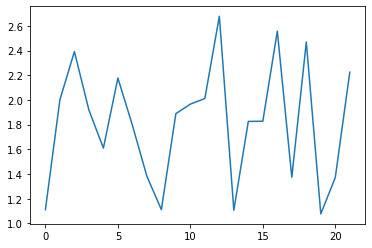

In [5]:
plt.plot(env)

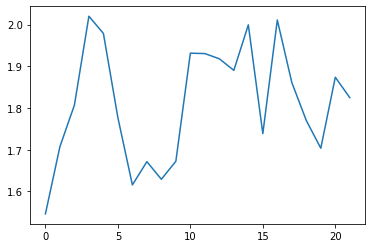

In [6]:
# smooth energies over bands first
env_smoothed = smooth_vector(env, 2)

plt.plot(env_smoothed)

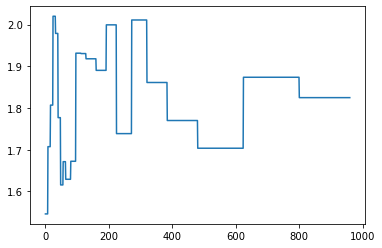

In [7]:
# generate scale factors
sf = np.zeros(N)

for i in range(num_bands - 1):
    sf[band_limits[i] : band_limits[i + 1]] = env_smoothed[i]
    
sf[band_limits[-1]:] = env_smoothed[-1]

plt.plot(sf)

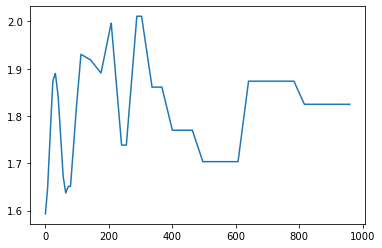

In [8]:
sf_smoothed = smooth_vector(sf, 16)

plt.plot(sf_smoothed)

In [9]:
# real example
in_vec = np.load('testinp.npy')

energy_means = np.array([
      6.437500, 6.250000, 5.750000, 5.312500, 5.062500,
      4.812500, 4.500000, 4.375000, 4.875000, 4.687500,
      4.562500, 4.437500, 4.875000, 4.625000, 4.312500,
      4.500000, 4.375000, 4.625000, 4.750000, 4.437500,
      3.750000, 3.750000, 3.750000, 3.750000, 3.750000
]).astype('float')

energies = 2**(2*(in_vec + energy_means[:21]))

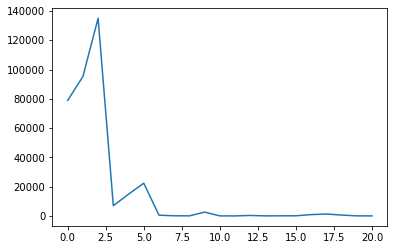

In [10]:
plt.plot(energies)

In [11]:
smooth_energies = np.exp(smooth_vector(np.log(energies), 2, lowpass='pyramid'))

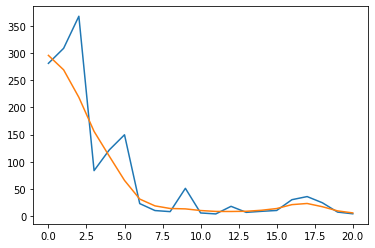

In [76]:
plt.plot(energies**.5)
plt.plot(smooth_energies**.5)

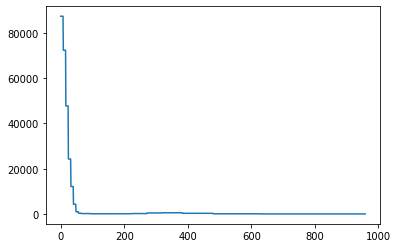

In [77]:
# generate scale factors
sf = np.zeros(N)
sf_orig = np.zeros(N)

for i in range(num_bands - 1):
    sf[band_limits[i] : band_limits[i + 1]] = smooth_energies[i]
    sf_orig[band_limits[i] : band_limits[i + 1]] = energies[i]
    
sf[band_limits[-1]:] = smooth_energies[-1]
sf_orig[band_limits[-1]:] = energies[-1]

plt.plot(sf)

In [85]:
sf_smoothed = smooth_vector(sf, 8, lowpass='pyramid')

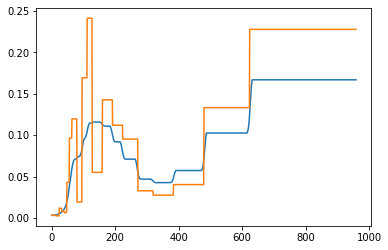

In [86]:
plt.plot(1/(np.sqrt(sf_smoothed)))
plt.plot(1/np.sqrt(sf_orig))